In [1]:
# Importing requirred libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

# Hierarchical
import scipy.cluster.hierarchy as sch    #For dendrogram
from sklearn.cluster import AgglomerativeClustering
# K-Means
from sklearn.cluster import KMeans
# DBSCAN
from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape

(50, 5)

In [5]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
df[df.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [10]:
df.T.duplicated()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

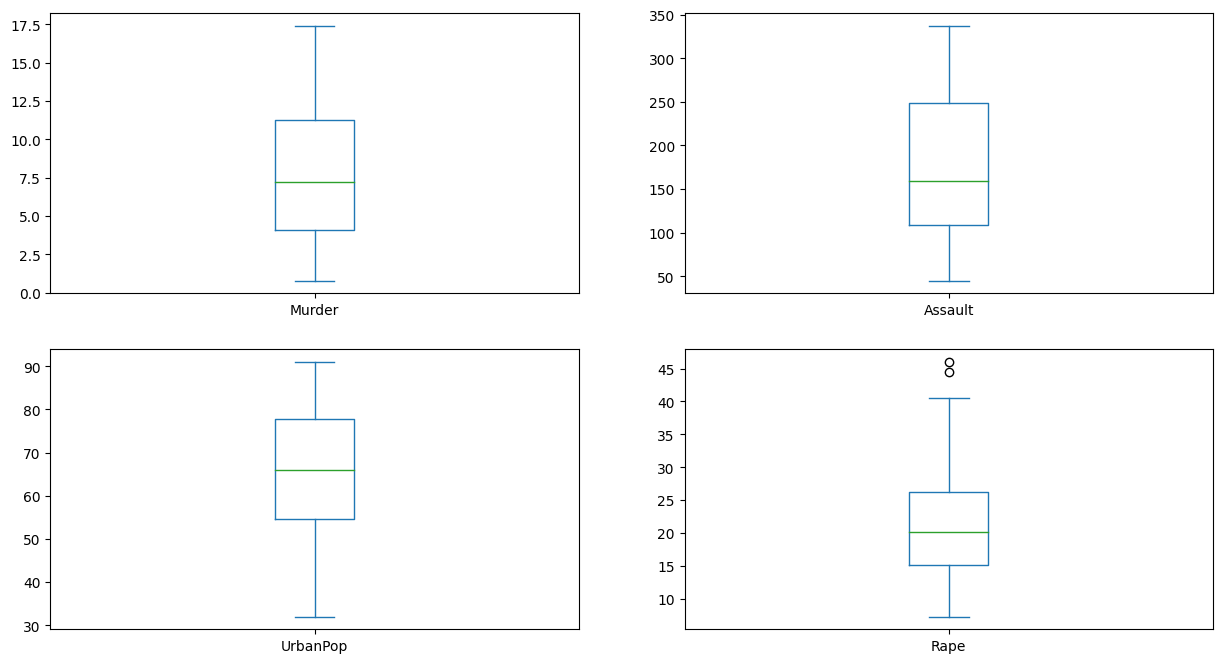

In [11]:
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(15,8))
plt.show()

    As we can see only few outliers in the Rape column and rest of the columns didn't contains any outliers and seems almost normal,
    which we can visualize below using density plot
  

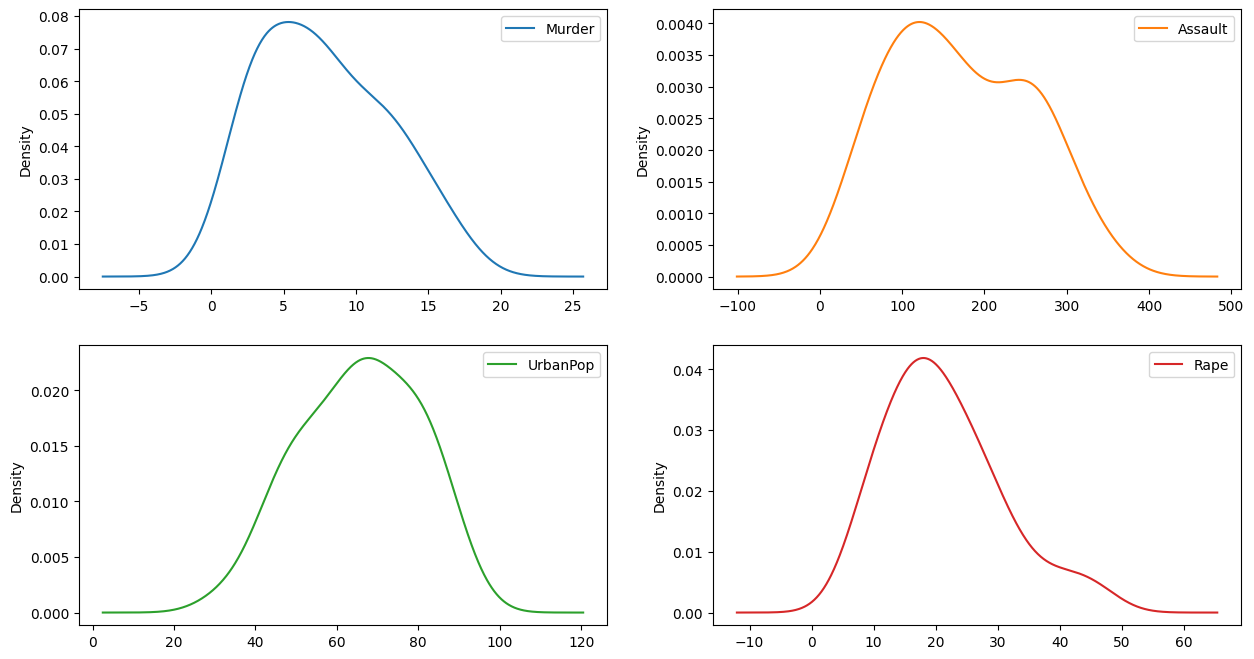

In [12]:
df.plot(kind='density',subplots=True,layout=(2,2),sharex=False, figsize=(15,8))
plt.show()

    Here we can see Rape column is little bit right skewed, which can also be seen from below Histograms

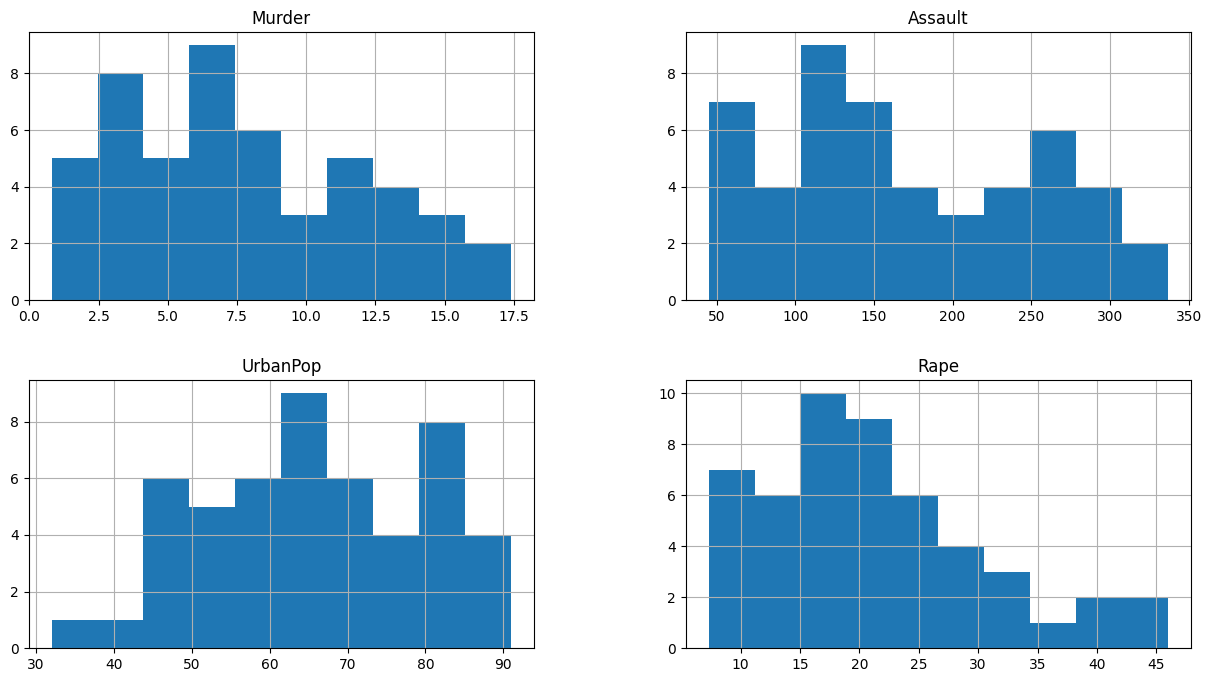

In [13]:
df.hist(figsize=(15,8))
plt.show()

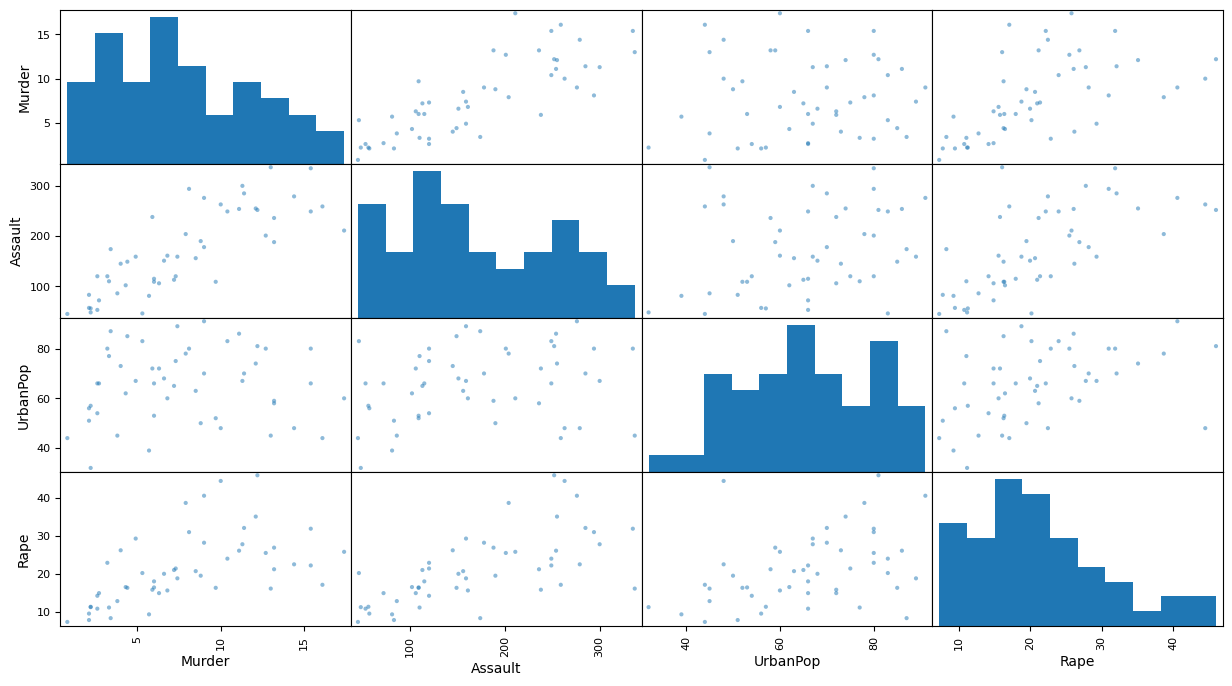

In [14]:
scatter_matrix(df,figsize=(15,8))
plt.show()

    - Above is the scatter plot, where Assault and Murder shows positive correlation, which means while Assault behaviour there is chance of Murder.
    - However, UrbanPop and Murder is not showing any correlation.
    - Rape and Murder somewhat seems positively correlated which means where ever the case of Rape there is the chance of Murder or Crime.
    - UrbanPop and Assault shows weak correlation however they are somewhat positively correlated which more the population more will be assault cases.
    - Rape and Assault showing positive correlation which means while there is assault there may be the chance of Rape cases.
    - Rape and UrbanPop shows moderate correlation more the UrbanPop more chance of Rape will be there.


###### Feature Scaling

In [15]:
# Standardizing the data
sc = StandardScaler()
df_stand = sc.fit_transform(df.iloc[:,1:])

In [16]:
cols = df.columns
columns = cols[1:]
df_stan = pd.DataFrame(df_stand,columns=columns)     # df_stan = Standardized df
df_stan.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


##### Model Building

###### Hierarchical Clustering

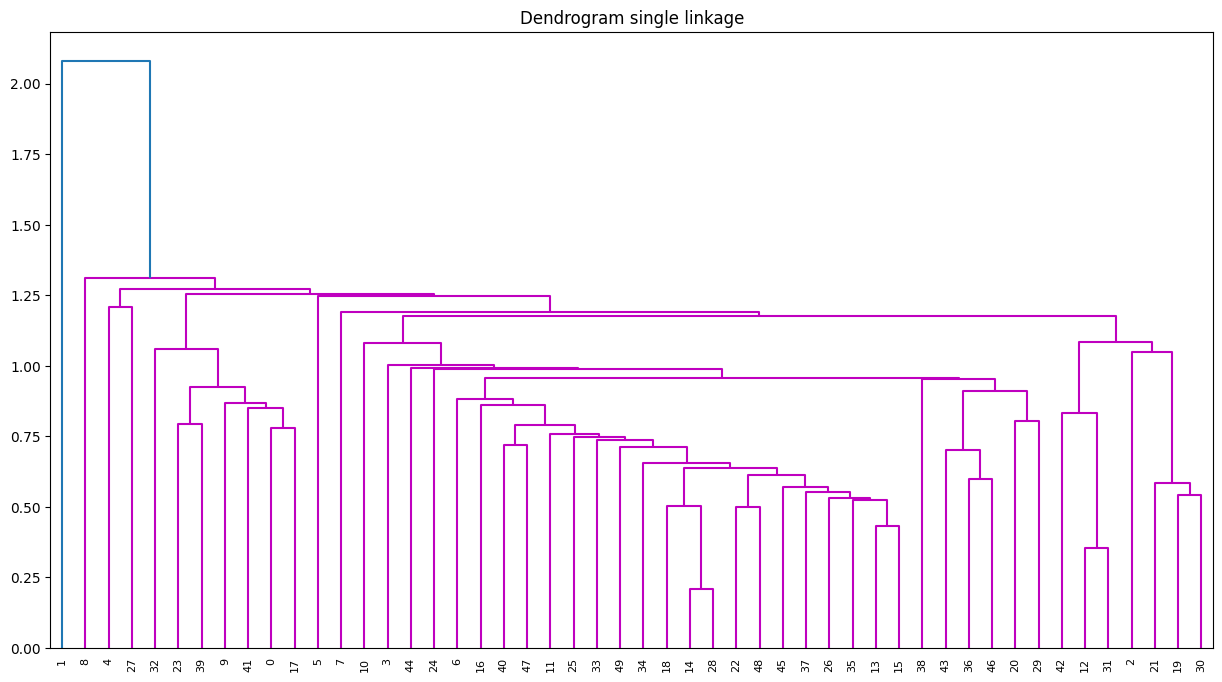

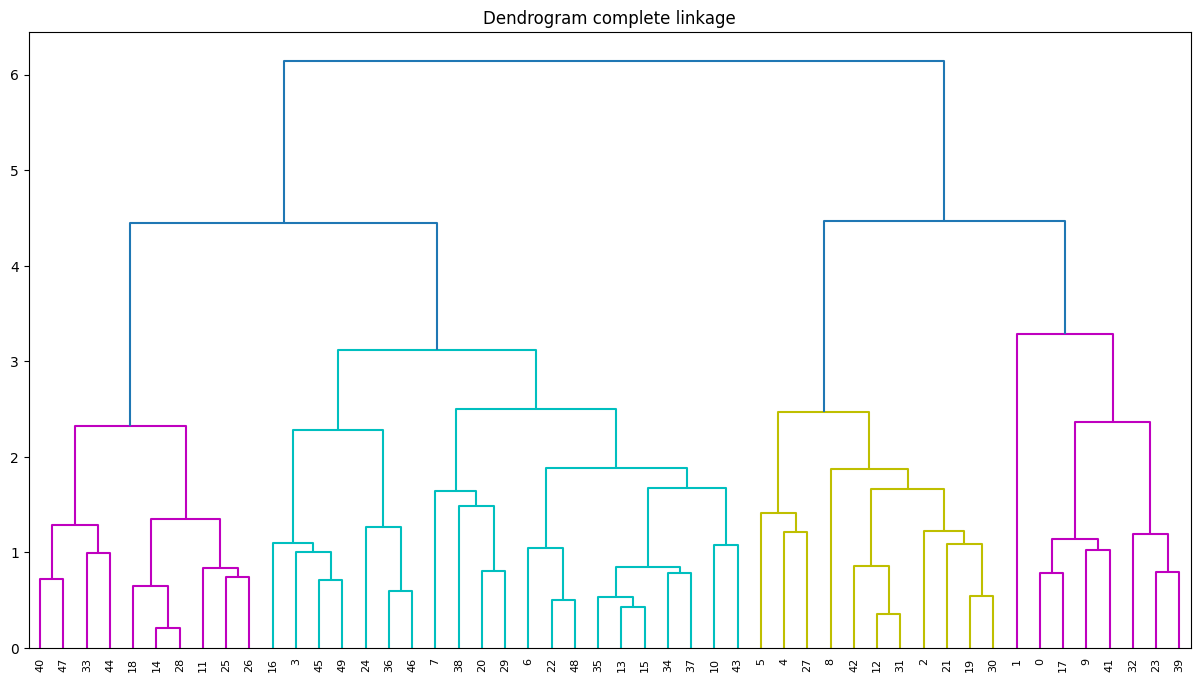

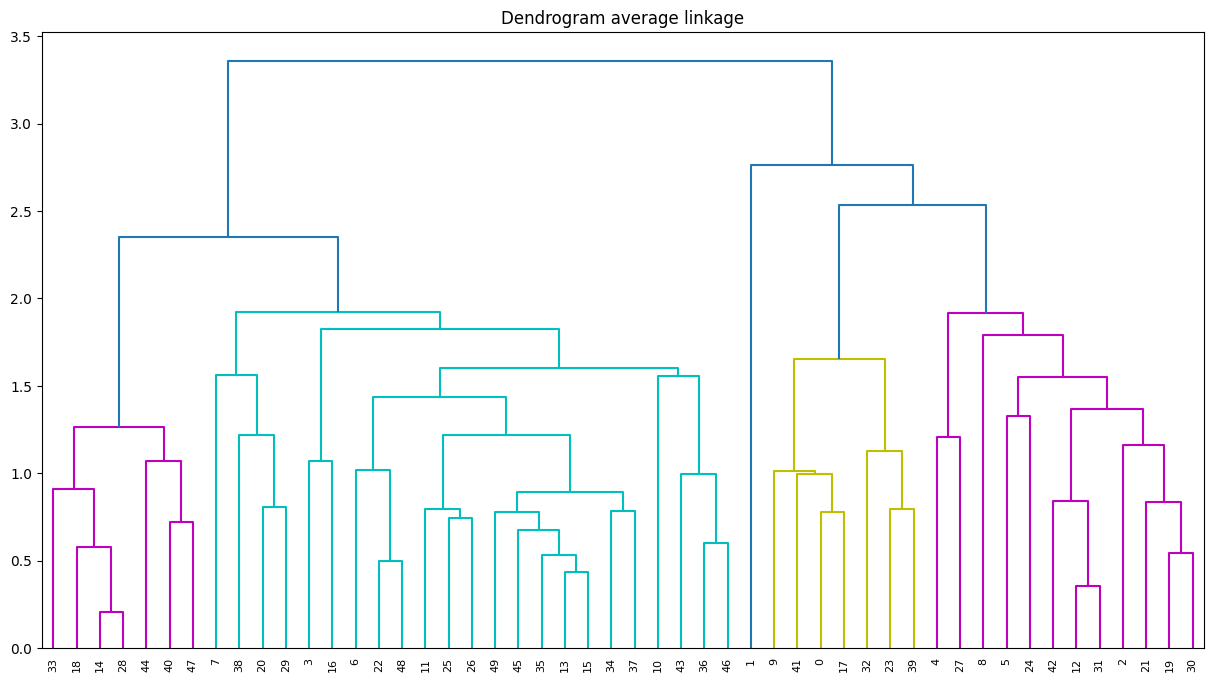

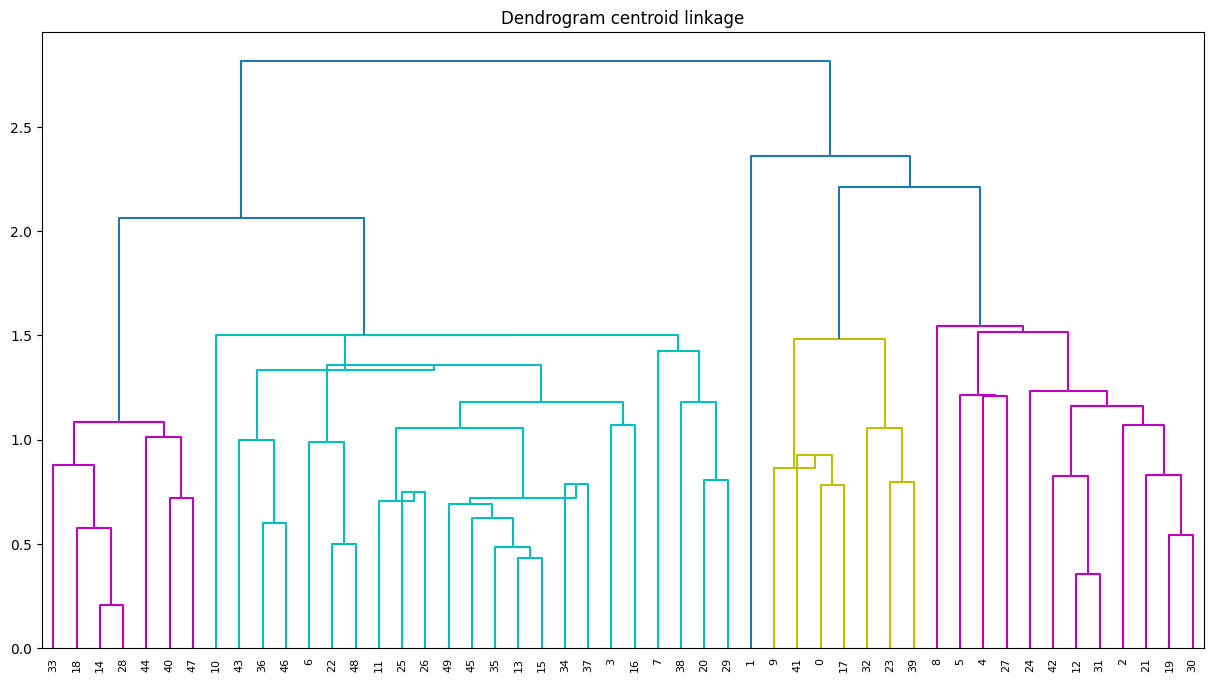

In [17]:
met = ['single','complete','average','centroid']
sch.set_link_color_palette(['m','c','y'])
for i in met:
  plt.figure(figsize=(15,8))
  plt.title(f'Dendrogram {i} linkage')
  dendrogram = sch.dendrogram(sch.linkage(df_stan,method=i))
  plt.show()
  print("\n")

    From above dendrograms of linkage single, complete, average, and centroid, complete seems to be optimal with 4 clusters,
    almost data optimally distributed and distance are less.

In [18]:
# So, here we go with complete linkage with 4 clusters

hc = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=4)

    Here model has been trained with 4 clusters using complete linkage

In [19]:
y_hc = hc.fit_predict(df_stan)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

In [20]:
df['h_cluster_id'] = y_hc

In [21]:
uni = np.unique(y_hc)
uni

array([0, 1, 2, 3])

In [22]:
for i in uni:
  print(df[df['h_cluster_id']==i])
  print('\n')

        Unnamed: 0  Murder  Assault  UrbanPop  Rape  h_cluster_id
0          Alabama    13.2      236        58  21.2             0
1           Alaska    10.0      263        48  44.5             0
9          Georgia    17.4      211        60  25.8             0
17       Louisiana    15.4      249        66  22.2             0
23     Mississippi    16.1      259        44  17.1             0
32  North Carolina    13.0      337        45  16.1             0
39  South Carolina    14.4      279        48  22.5             0
41       Tennessee    13.2      188        59  26.9             0


       Unnamed: 0  Murder  Assault  UrbanPop  Rape  h_cluster_id
3        Arkansas     8.8      190        50  19.5             1
6     Connecticut     3.3      110        77  11.1             1
7        Delaware     5.9      238        72  15.8             1
10         Hawaii     5.3       46        83  20.2             1
13        Indiana     7.2      113        65  21.0             1
15         Kan

In [23]:
for i in range(0,4):
  df['h_cluster_id'] = df['h_cluster_id'].replace(0,'Cluster 1')
  df['h_cluster_id'] = df['h_cluster_id'].replace(1,'Cluster 2')
  df['h_cluster_id'] = df['h_cluster_id'].replace(2,'Cluster 3')
  df['h_cluster_id'] = df['h_cluster_id'].replace(3,'Cluster 4')
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id
0,Alabama,13.2,236,58,21.2,Cluster 1
1,Alaska,10.0,263,48,44.5,Cluster 1
2,Arizona,8.1,294,80,31.0,Cluster 3
3,Arkansas,8.8,190,50,19.5,Cluster 2
4,California,9.0,276,91,40.6,Cluster 3
5,Colorado,7.9,204,78,38.7,Cluster 3
6,Connecticut,3.3,110,77,11.1,Cluster 2
7,Delaware,5.9,238,72,15.8,Cluster 2
8,Florida,15.4,335,80,31.9,Cluster 3
9,Georgia,17.4,211,60,25.8,Cluster 1


In [24]:
df['h_cluster_id'].value_counts()

Cluster 2    21
Cluster 3    11
Cluster 4    10
Cluster 1     8
Name: h_cluster_id, dtype: int64

    Here, we can see Cluster 1 has 8 places, Cluster 2 has 10 places, Cluster 3 has 11 places, and Cluster 4 has 21 places.

In [25]:
df.groupby('h_cluster_id').mean()

<ipython-input-25-099da1c02ce9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('h_cluster_id').mean()


,Murder,Assault,UrbanPop,Rape
h_cluster_id,,,,
Cluster 1,14.087500,252.750000,53.500000,24.537500
Cluster 2,5.871429,134.476190,70.761905,18.580952
Cluster 3,11.054545,264.090909,79.090909,32.618182
Cluster 4,3.180000,78.700000,49.300000,11.630000


    Here, the average value of Murder in Cluster 1 is 14.087, for Assault it is 252.75, UrbanPop is 53.5, and Rape is 24.53 same way for other clusters has been defined

###### K-Means

    Elbow Plot to decide K-value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[200.00000000000003, 104.96163315756871, 80.0888613219962, 57.55425863091105, 50.52026552535068, 43.927464044975736, 40.52183461131976, 34.68738839784909, 32.70648136388185]


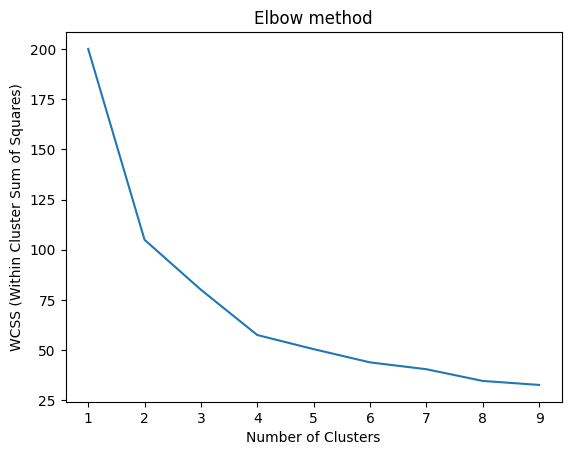

In [26]:
# WCSS (within cluster sum of squares)
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df_stan)
  wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1,10),wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

    Here, we can see the Elbow point is 4, where the decreasing gets slowed, so we are going to select 4 as our K or cluster value.

In [27]:
# Here also we are selecting 4 clusters

clusters = KMeans(n_clusters=4,random_state=0)
clusters.fit(df_stan)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

    Fitting the model with 4 clusters and random_state as 0.

In [28]:
label = clusters.labels_
label

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [29]:
df['k_cluster_id'] = clusters.labels_
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,k_cluster_id
0,Alabama,13.2,236,58,21.2,Cluster 1,3
1,Alaska,10.0,263,48,44.5,Cluster 1,1
2,Arizona,8.1,294,80,31.0,Cluster 3,1
3,Arkansas,8.8,190,50,19.5,Cluster 2,3
4,California,9.0,276,91,40.6,Cluster 3,1
5,Colorado,7.9,204,78,38.7,Cluster 3,1
6,Connecticut,3.3,110,77,11.1,Cluster 2,0
7,Delaware,5.9,238,72,15.8,Cluster 2,0
8,Florida,15.4,335,80,31.9,Cluster 3,1
9,Georgia,17.4,211,60,25.8,Cluster 1,3


In [30]:
clusters.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [31]:
df.groupby('k_cluster_id').agg(['mean']).reset_index()     #Ignore h_cluster_id

<ipython-input-31-0ebf595c277d>:1: FutureWarning: ['Unnamed: 0', 'h_cluster_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('k_cluster_id').agg(['mean']).reset_index()     #Ignore h_cluster_id


,k_cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [32]:
for i in range(0,4):
  df['k_cluster_id'] = df['k_cluster_id'].replace(0,'Cluster 1')
  df['k_cluster_id'] = df['k_cluster_id'].replace(1,'Cluster 2')
  df['k_cluster_id'] = df['k_cluster_id'].replace(2,'Cluster 3')
  df['k_cluster_id'] = df['k_cluster_id'].replace(3,'Cluster 4')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,k_cluster_id
0,Alabama,13.2,236,58,21.2,Cluster 1,Cluster 4
1,Alaska,10.0,263,48,44.5,Cluster 1,Cluster 2
2,Arizona,8.1,294,80,31.0,Cluster 3,Cluster 2
3,Arkansas,8.8,190,50,19.5,Cluster 2,Cluster 4
4,California,9.0,276,91,40.6,Cluster 3,Cluster 2
5,Colorado,7.9,204,78,38.7,Cluster 3,Cluster 2
6,Connecticut,3.3,110,77,11.1,Cluster 2,Cluster 1
7,Delaware,5.9,238,72,15.8,Cluster 2,Cluster 1
8,Florida,15.4,335,80,31.9,Cluster 3,Cluster 2
9,Georgia,17.4,211,60,25.8,Cluster 1,Cluster 4


In [33]:
df['k_cluster_id'].value_counts()

Cluster 1    16
Cluster 2    13
Cluster 3    13
Cluster 4     8
Name: k_cluster_id, dtype: int64

    Here, in KMeans we can see 16 places are clustered into Cluster 1, 13 in Cluster 2, 13 in Cluster 3, and 8 are in Cluster 4.

###### DBSCAN

In [34]:
dbscan = DBSCAN(eps=2,min_samples=3)
dbscan.fit(df_stan)

DBSCAN(eps=2, min_samples=3)

In [35]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [36]:
# Since, the data is very  less, only 50 rows so it is giving only one cluster i.e. 0 and one noise i.e. -1

df['d_cluster_id'] = dbscan.labels_
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,k_cluster_id,d_cluster_id
0,Alabama,13.2,236,58,21.2,Cluster 1,Cluster 4,0
1,Alaska,10.0,263,48,44.5,Cluster 1,Cluster 2,-1
2,Arizona,8.1,294,80,31.0,Cluster 3,Cluster 2,0
3,Arkansas,8.8,190,50,19.5,Cluster 2,Cluster 4,0
4,California,9.0,276,91,40.6,Cluster 3,Cluster 2,0


In [37]:
for i in range(-1,0):
  df['d_cluster_id'] = df['d_cluster_id'].replace(-1,'Noise')
  df['d_cluster_id'] = df['d_cluster_id'].replace(0,'Cluster 1')

In [38]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,k_cluster_id,d_cluster_id
0,Alabama,13.2,236,58,21.2,Cluster 1,Cluster 4,Cluster 1
1,Alaska,10.0,263,48,44.5,Cluster 1,Cluster 2,Noise
2,Arizona,8.1,294,80,31.0,Cluster 3,Cluster 2,Cluster 1
3,Arkansas,8.8,190,50,19.5,Cluster 2,Cluster 4,Cluster 1
4,California,9.0,276,91,40.6,Cluster 3,Cluster 2,Cluster 1
5,Colorado,7.9,204,78,38.7,Cluster 3,Cluster 2,Cluster 1
6,Connecticut,3.3,110,77,11.1,Cluster 2,Cluster 1,Cluster 1
7,Delaware,5.9,238,72,15.8,Cluster 2,Cluster 1,Cluster 1
8,Florida,15.4,335,80,31.9,Cluster 3,Cluster 2,Cluster 1
9,Georgia,17.4,211,60,25.8,Cluster 1,Cluster 4,Cluster 1


In [39]:
df['d_cluster_id'].value_counts()

Cluster 1    49
Noise         1
Name: d_cluster_id, dtype: int64

### EastWest Airlines

    Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
    
    Draw the inferences from the clusters obtained.

    Data Description:

      The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program.
      For each passenger the data include information on their mileage history and on different ways they accrued or
      spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics
      for the purpose of targeting different segments for different types of mileage offers

        ID --Unique ID
        Balance--Number of miles eligible for award travel
        Qual_mile--Number of miles counted as qualifying for Topflight status
        cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
        cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
        cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

          1 = under 5,000
          2 = 5,000 - 10,000
          3 = 10,001 - 25,000
          4 = 25,001 - 50,000
          5 = over 50,000

        Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
        Bonus_trans--Number of non-flight bonus transactions in the past 12 months
        Flight_miles_12mo--Number of flight miles in the past 12 months
        Flight_trans_12--Number of flight transactions in the past 12 months
        Days_since_enrolled--Number of days since enrolled in flier program
        Award--whether that person had award flight (free flight) or not




In [40]:
from google.colab import files
doc = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (2).csv


In [41]:
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


##### Descriptive Statistics

In [42]:
df.shape

(3999, 12)

In [43]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [45]:
df1 = df.iloc[:,1:]
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [46]:
df1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


###### EDA

In [47]:
df1.isna().sum()
#Checking null values present

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [48]:
df1[df1.duplicated()]
# Checking duplicate values in rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [49]:
df1.T.duplicated()
# Checking duplicate values in columns

Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award?               False
dtype: bool

In [50]:
df1.shape

(3999, 11)

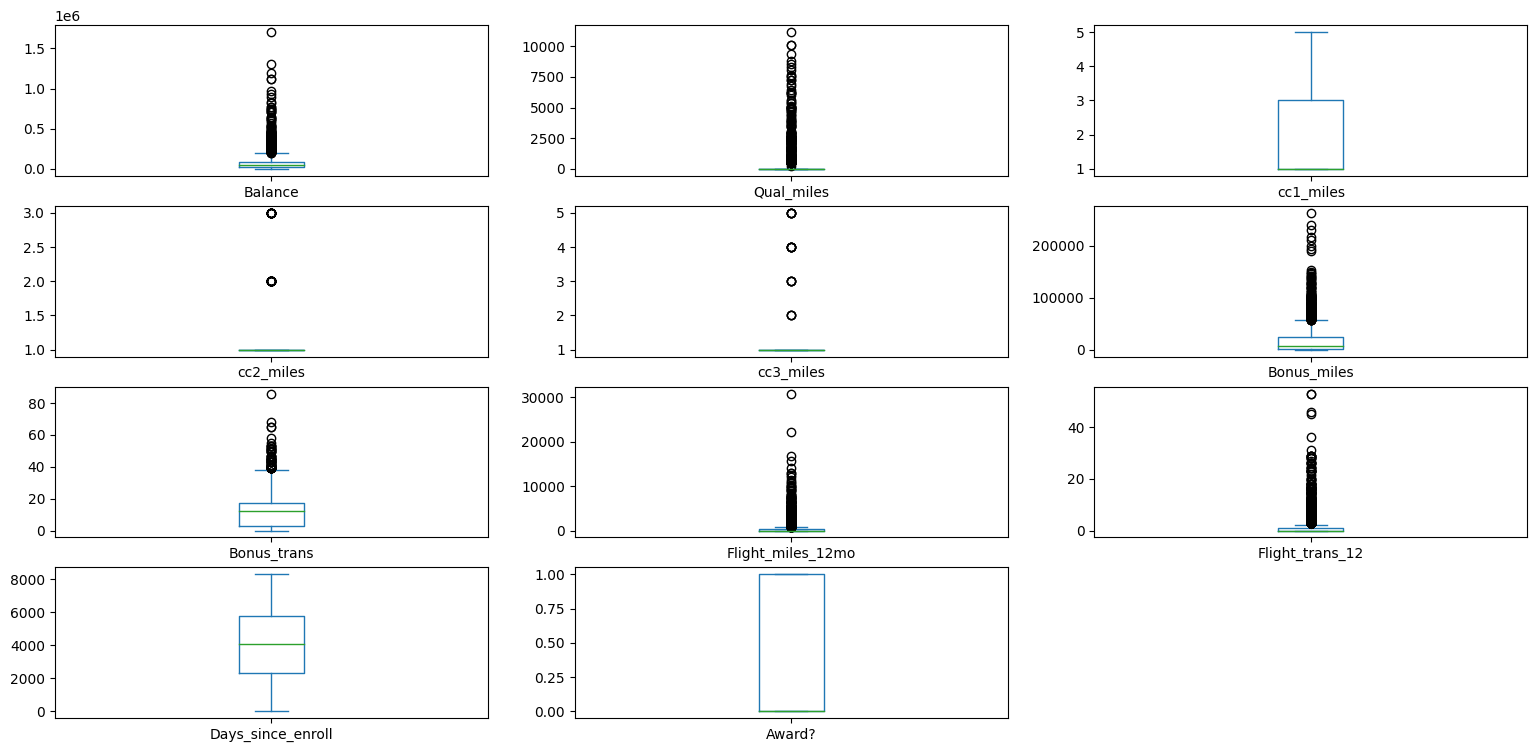

In [51]:
df1.plot(kind='box',subplots=True,layout=(4,3),figsize=(19,9))
plt.show()

    Here, we can see Balance, Qual_miles, Bonus_miles, Bonus_trans, Flight_miles, and Flight_trans contains very high outliers
    where as cc2_miles and cc3_miles contains less outliers and reset contains no outliers.

    Below we can see the density plot where data seems to have right skewed.
    Histogram also shows high concentration of the are at earlier and then data are right skewed.

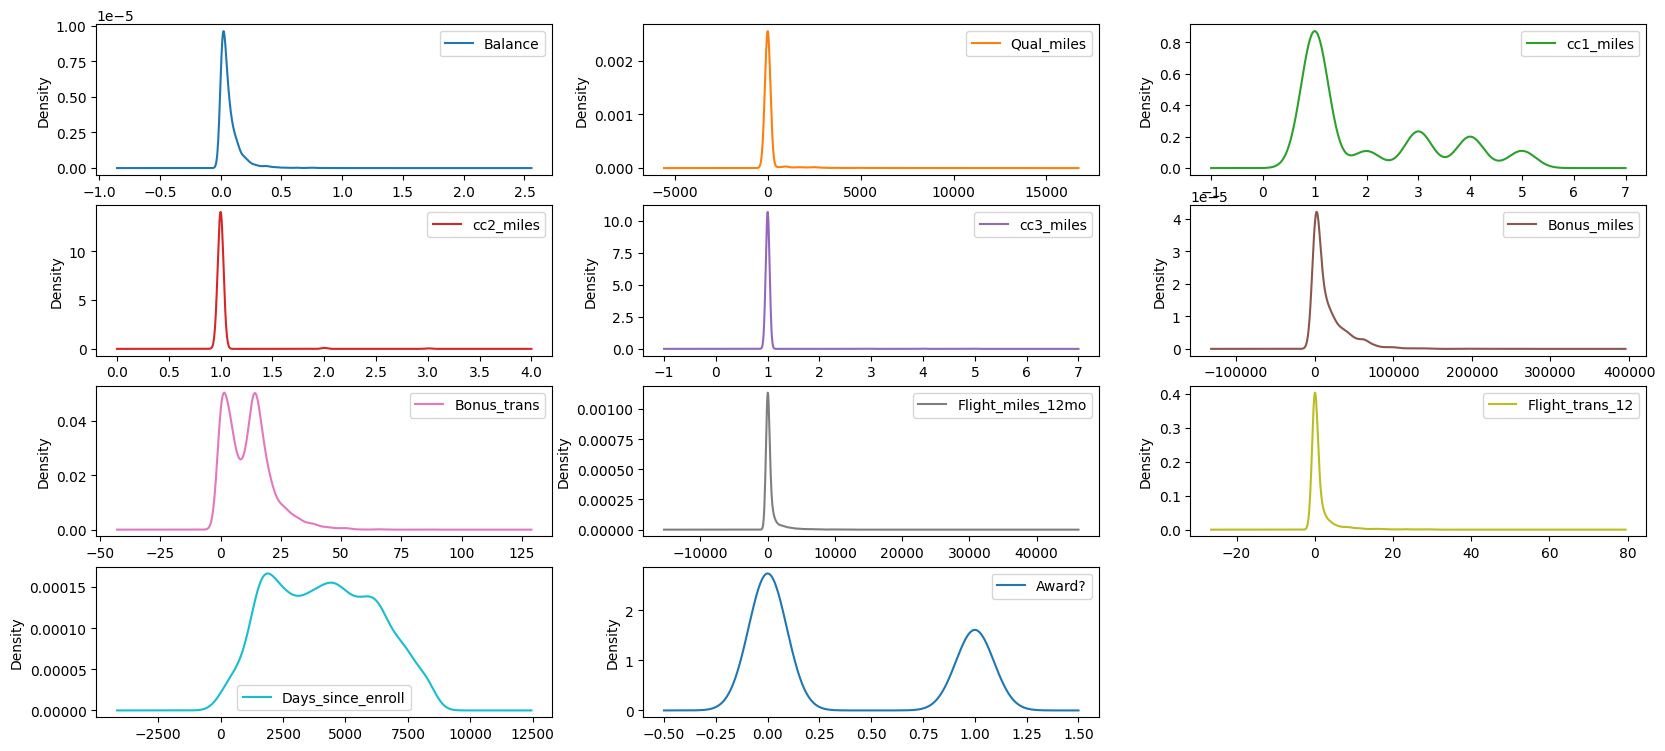

In [52]:
df1.plot(kind='density',subplots=True,layout=(4,3),sharex=False, figsize=(20,9))
plt.show()


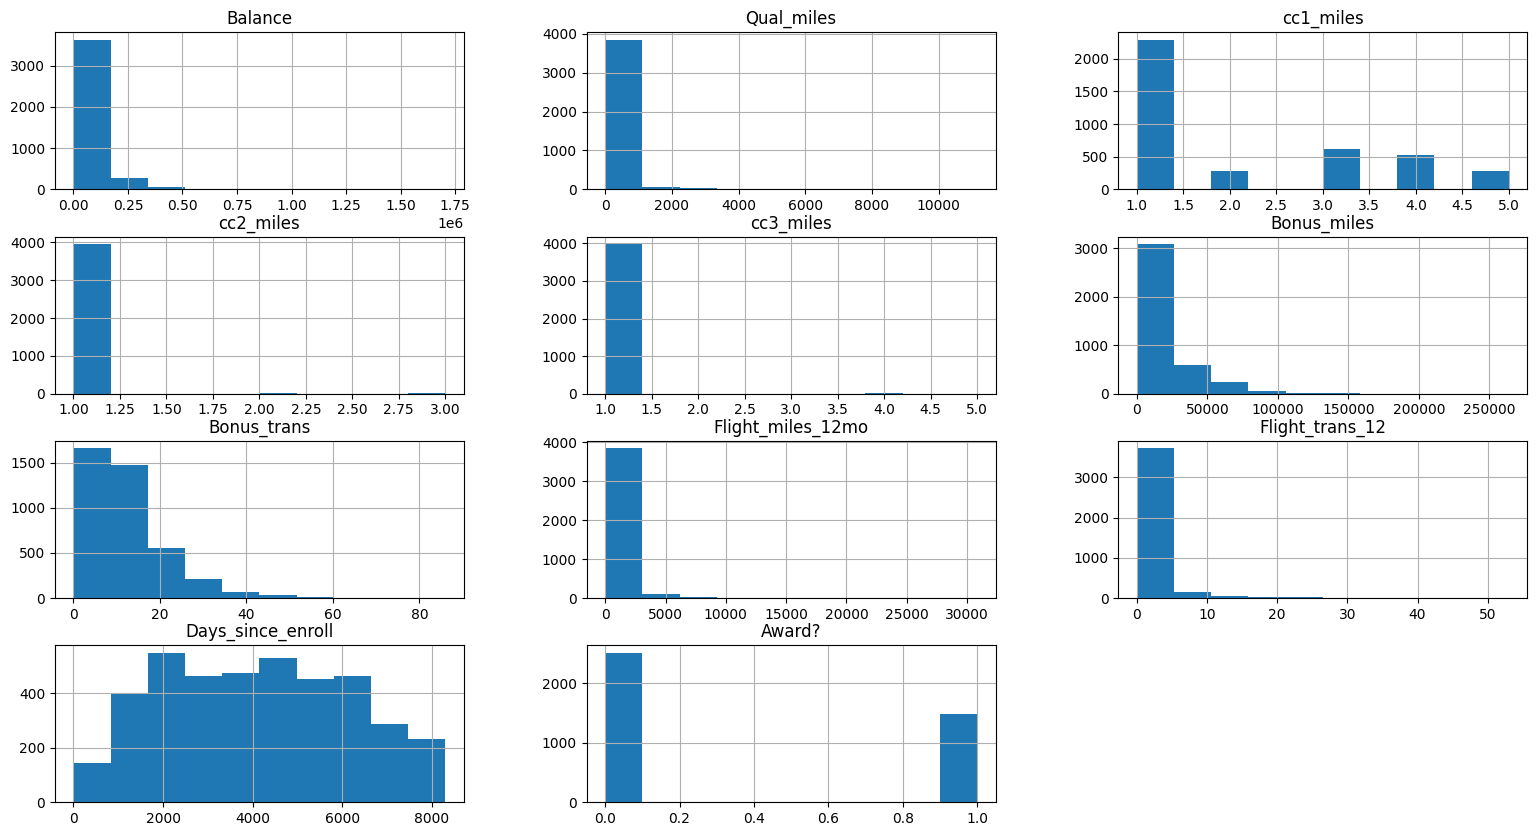

In [53]:
df1.hist(figsize=(19,10),layout=(4,3))
plt.show()

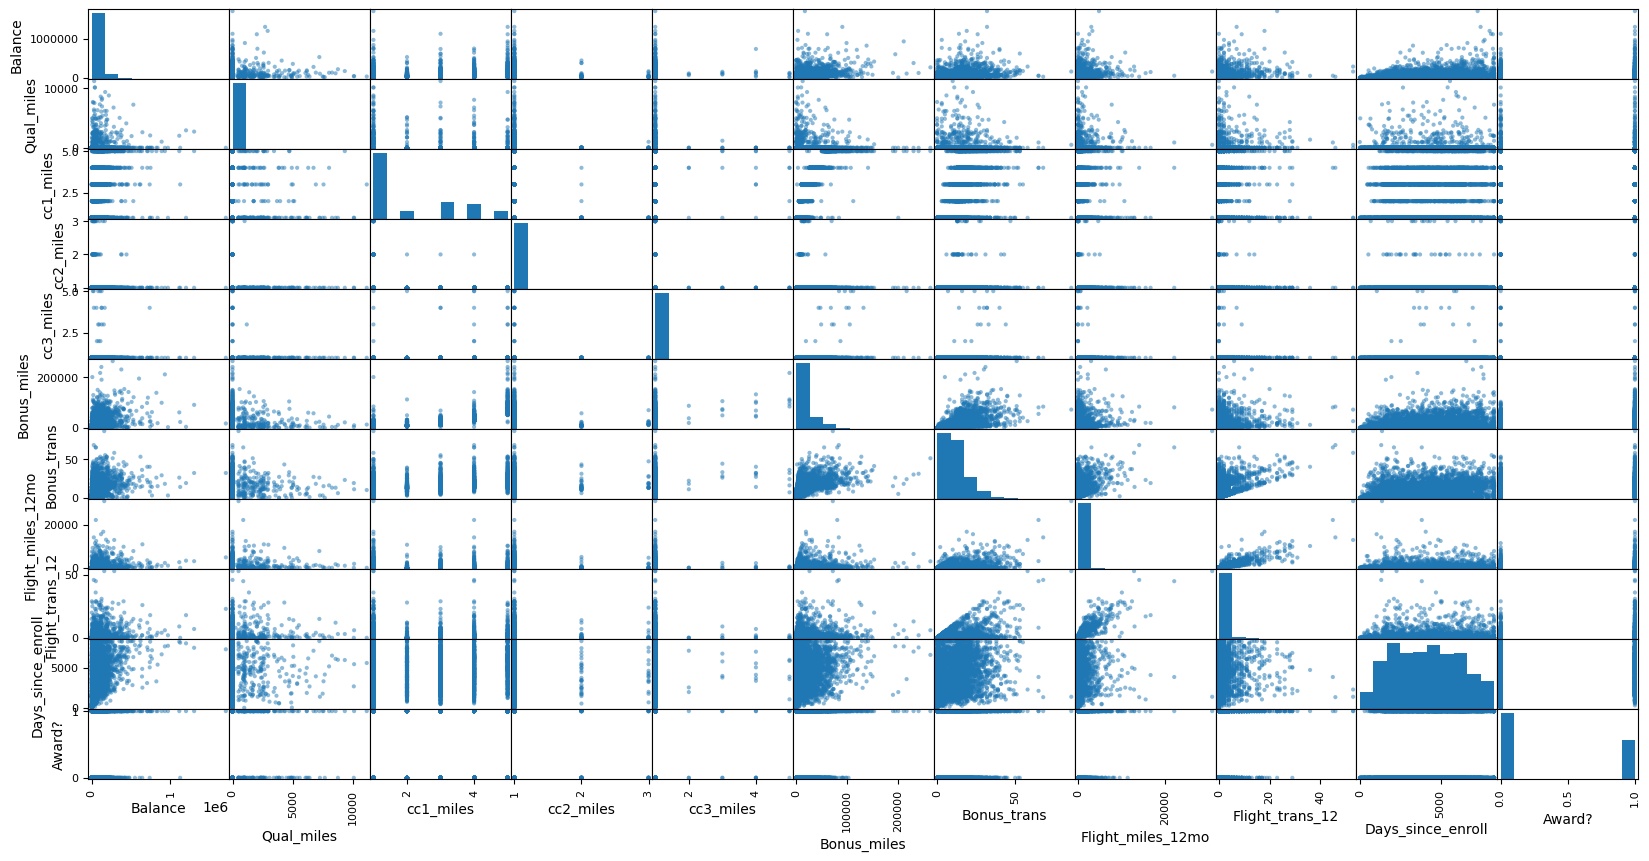

In [54]:
scatter_matrix(df1,figsize=(20,10))
plt.show()

###### Feature Scaling

In [55]:
# Standardizing the data
sc = StandardScaler()
df_stand = sc.fit_transform(df1)

In [56]:
cols = df1.columns
df_stan = pd.DataFrame(df_stand,columns=cols)     # df_stan = Standardized df
df_stan.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


##### Model Building

###### Hierarchical

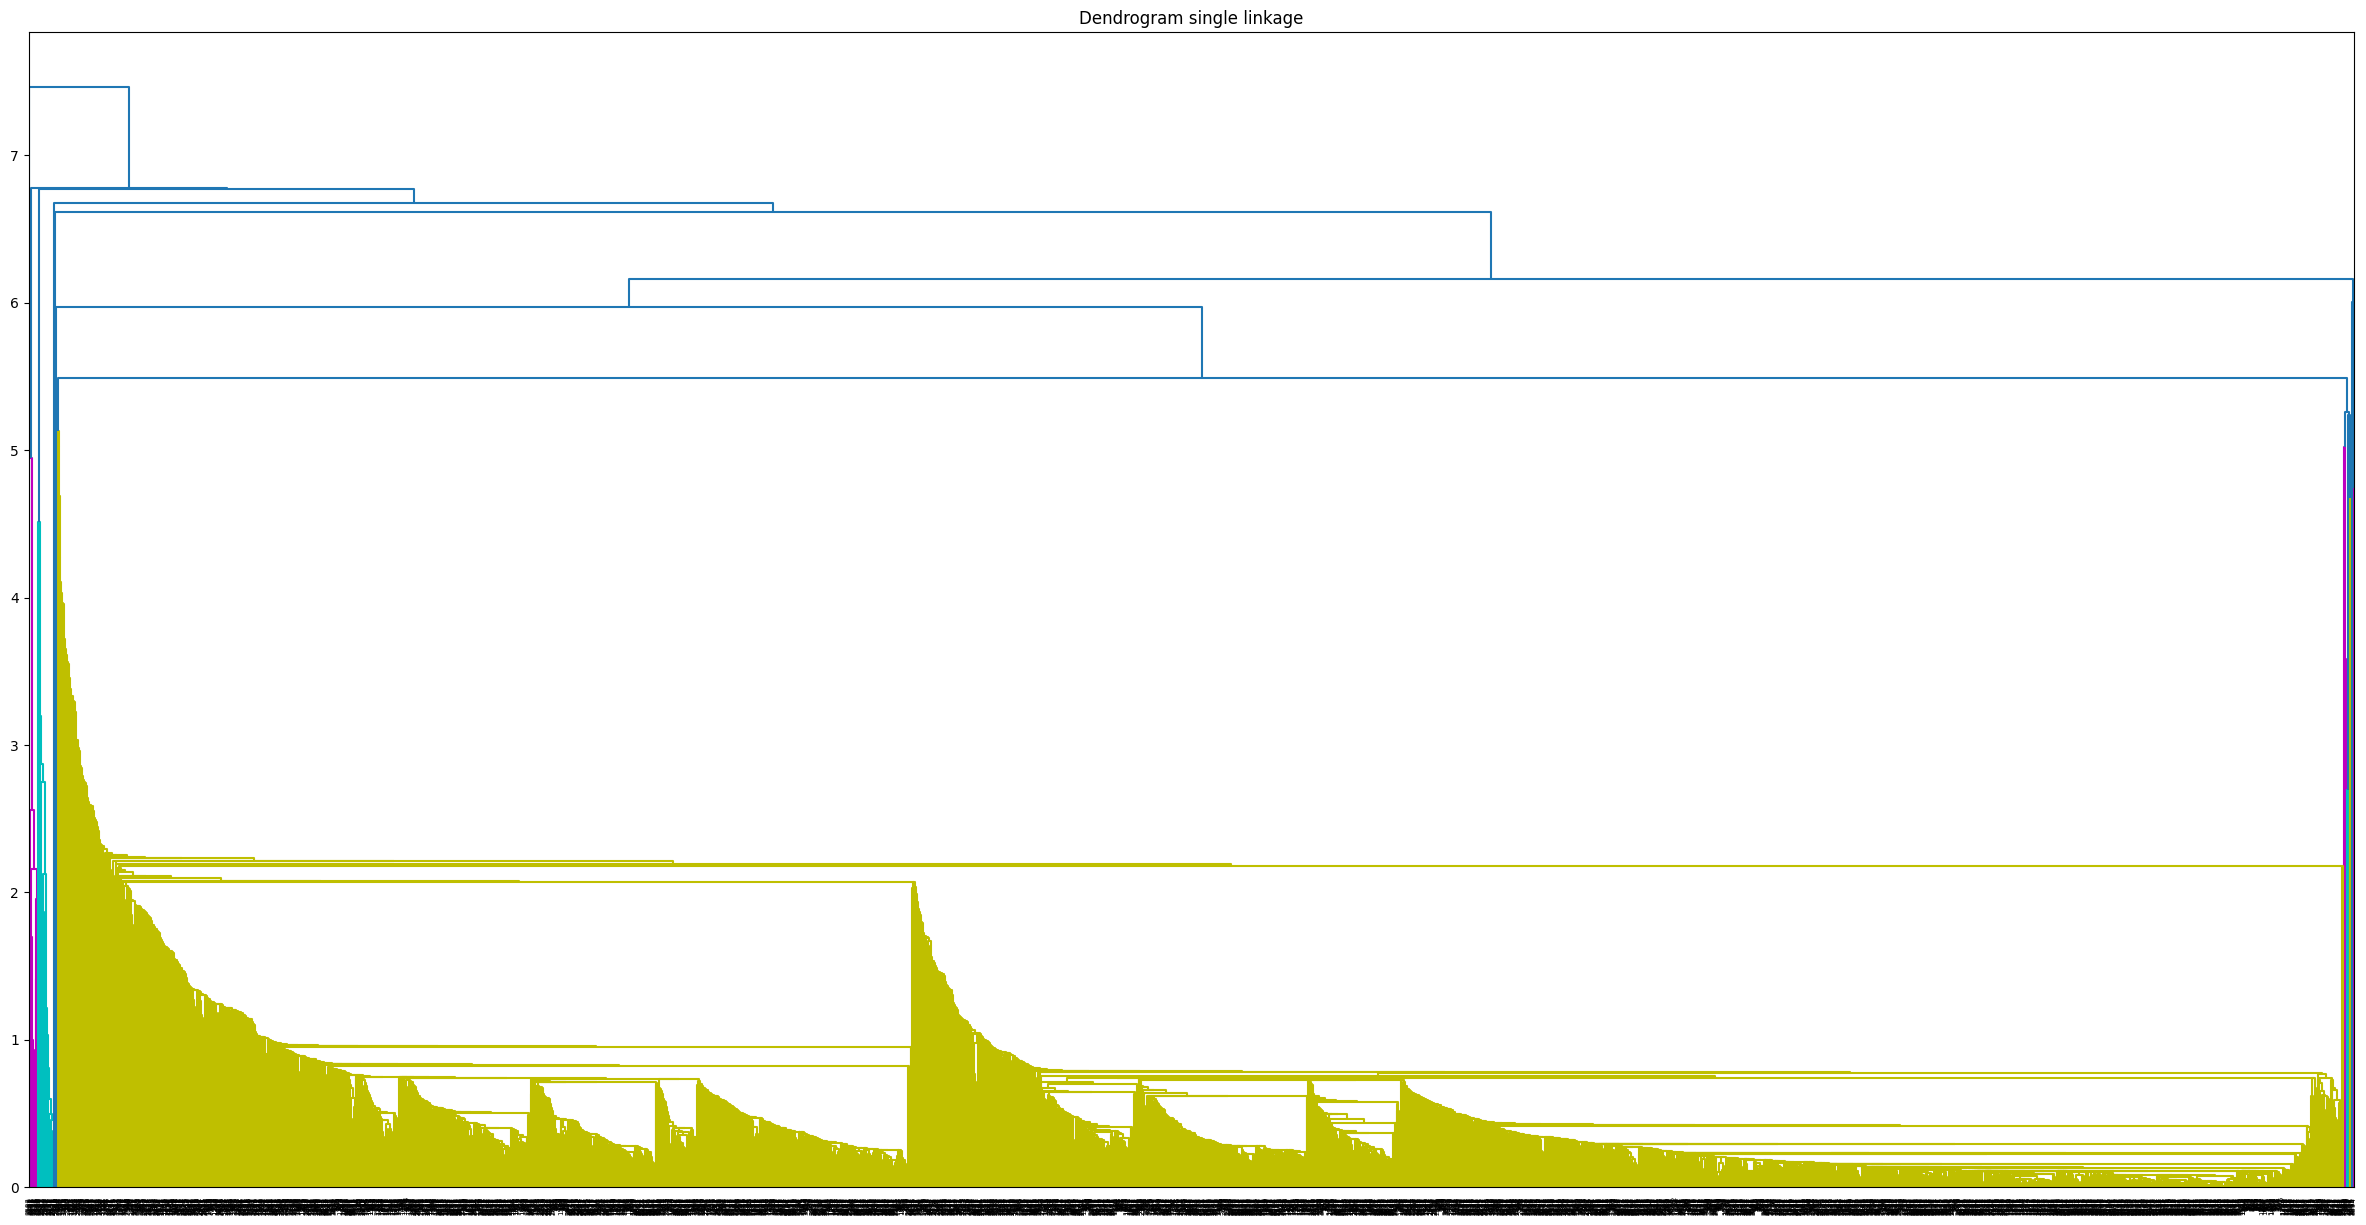

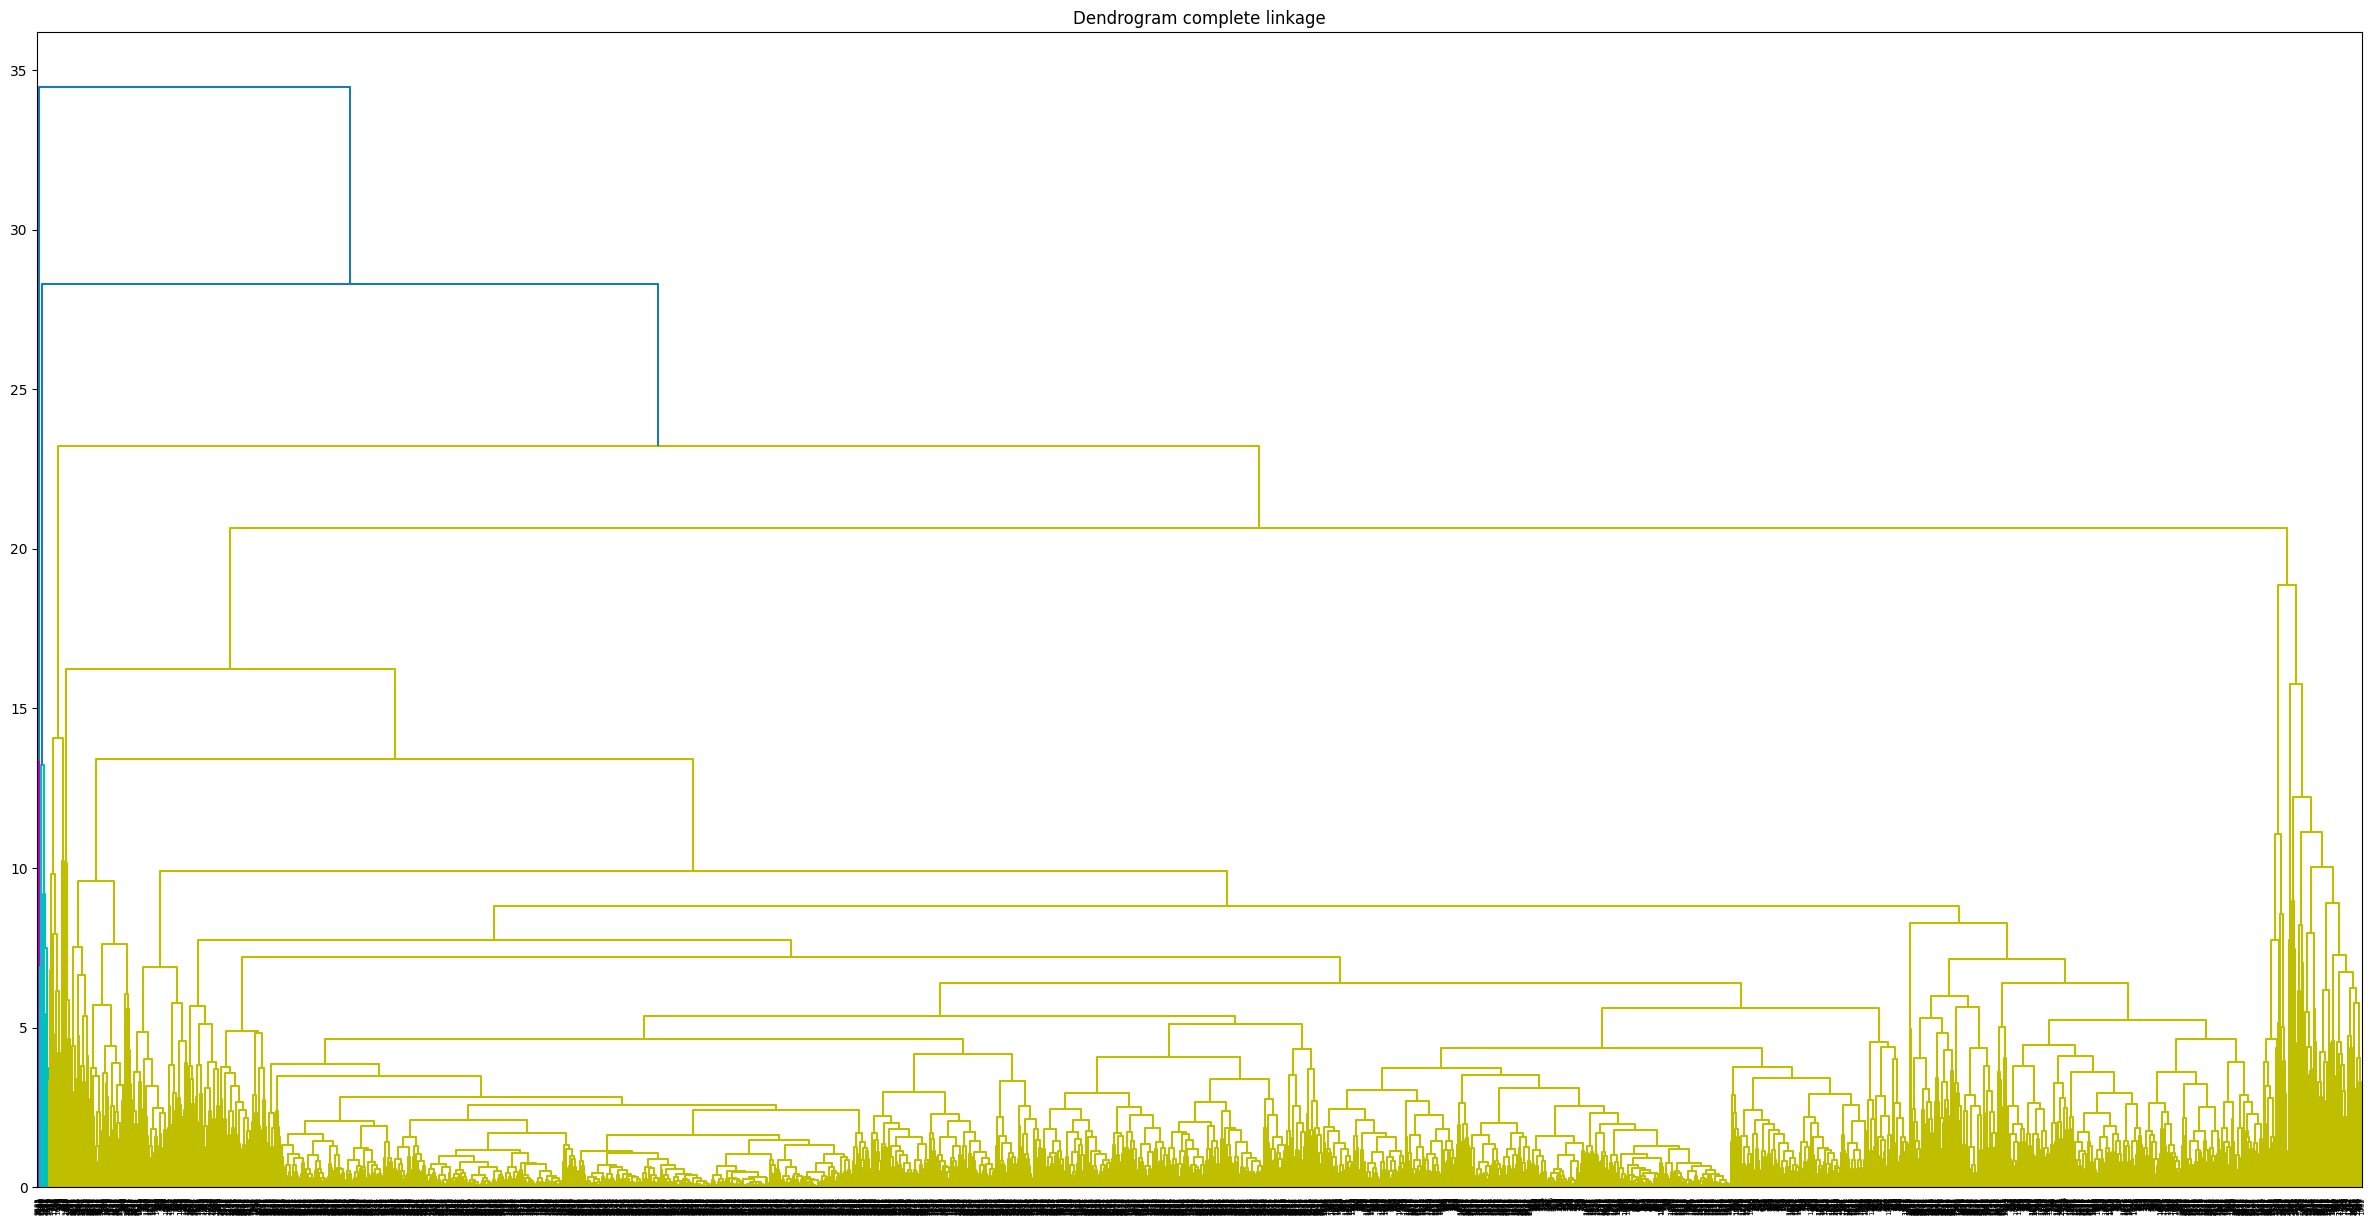

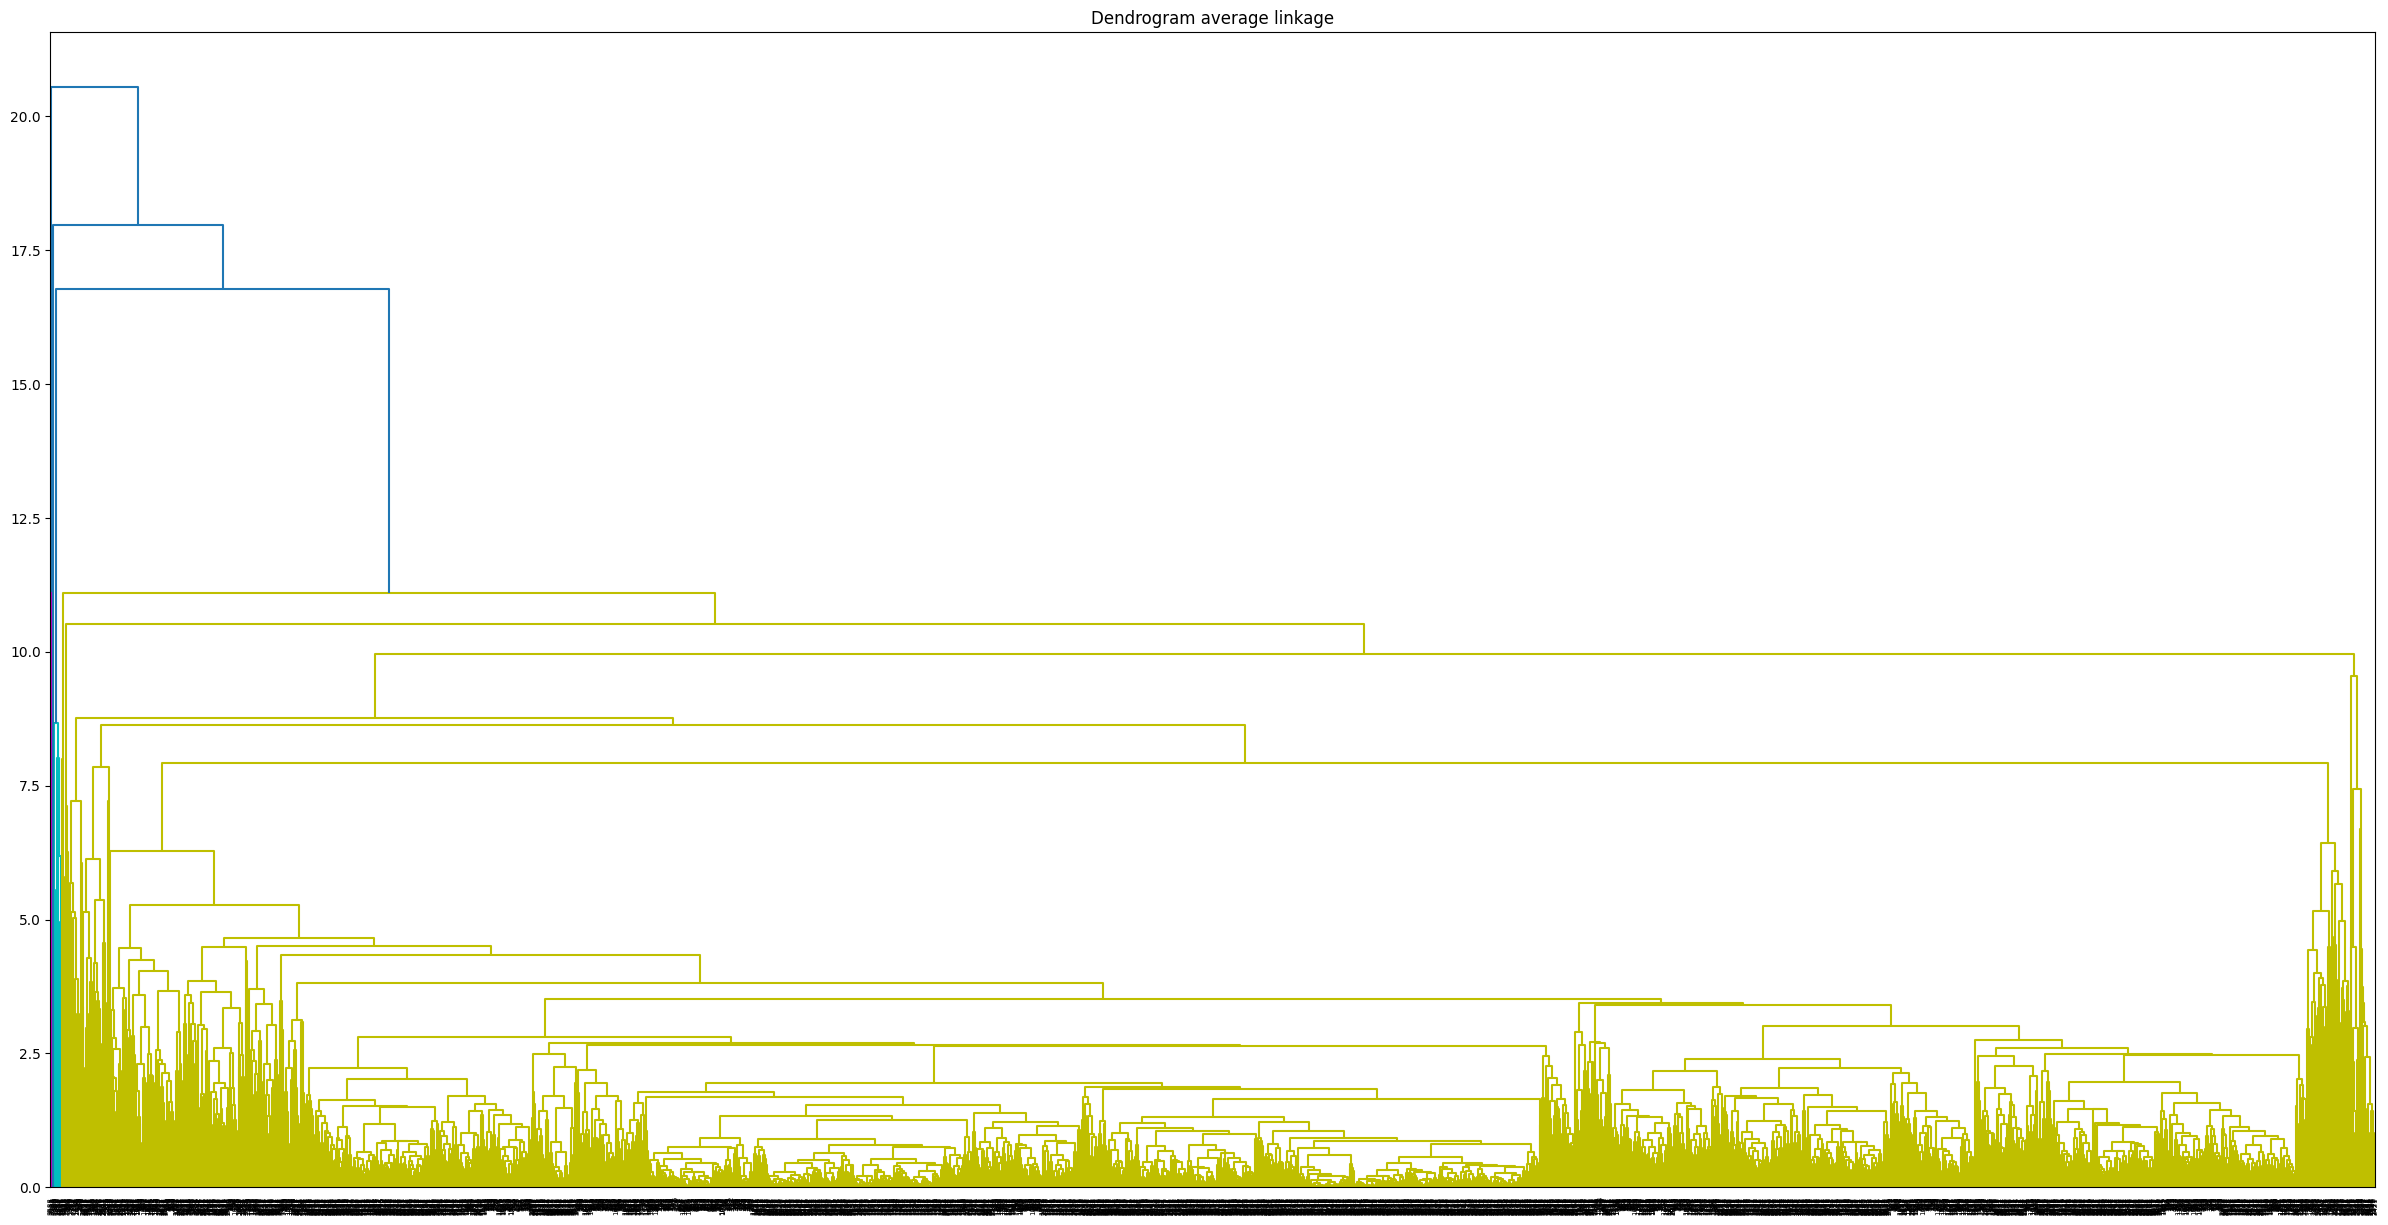

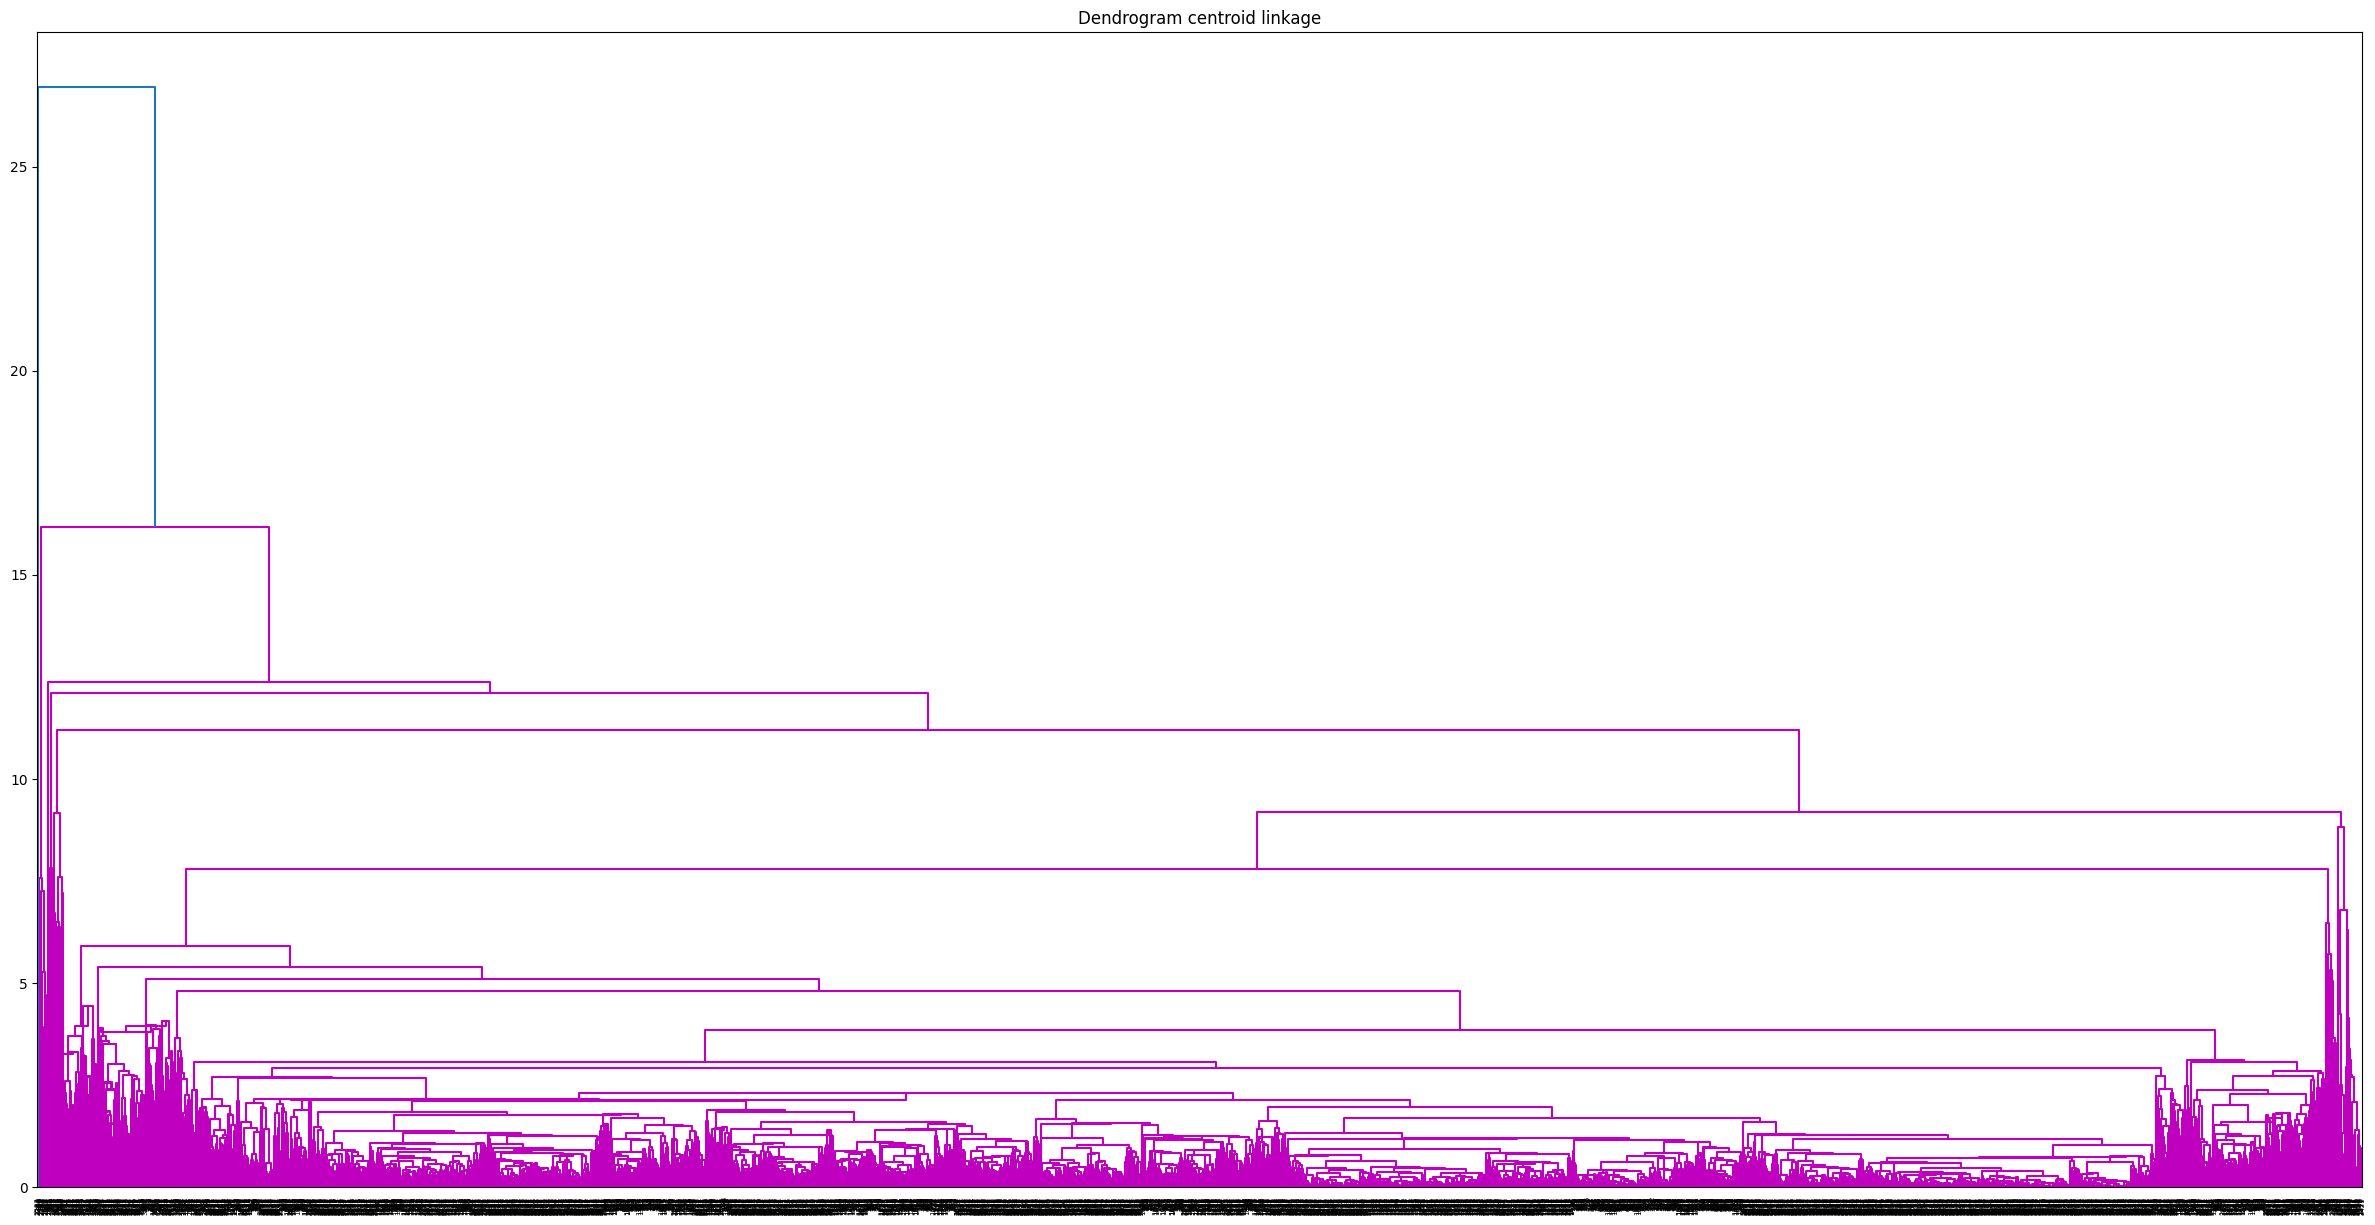

In [57]:
method = ['single','complete','average','centroid']
sch.set_link_color_palette(['m','c','y'])
for i in method:
  plt.figure(figsize=(30,15))
  plt.title(f'Dendrogram {i} linkage')
  dendrogram = sch.dendrogram(sch.linkage(df_stan,method=i))
  plt.show()
  print("\n")

In [59]:
y_hc = hc.fit_predict(df_stan)
y_hc

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
df['h_cluster_id'] = y_hc
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [61]:
for i in range(0,4):
  df['h_cluster_id'] = df['h_cluster_id'].replace(0,'Cluster 1')
  df['h_cluster_id'] = df['h_cluster_id'].replace(1,'Cluster 2')
  df['h_cluster_id'] = df['h_cluster_id'].replace(2,'Cluster 3')
  df['h_cluster_id'] = df['h_cluster_id'].replace(3,'Cluster 4')
  df['h_cluster_id'] = df['h_cluster_id'].replace(4,'Cluster 5')
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,Cluster 2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,Cluster 2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,Cluster 2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,Cluster 1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,Cluster 2


In [62]:
df['h_cluster_id'].value_counts()

Cluster 2    3782
Cluster 1     170
Cluster 5      28
Cluster 3      15
Cluster 4       4
Name: h_cluster_id, dtype: int64

    Here, we can see high concentration of the passengers lies in Cluster 2, then in Cluster 1 then gradually it decreases to very less to 4 in Cluster 4

In [63]:
df.groupby('h_cluster_id').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_cluster_id,,,,,,,,,,,,
Cluster 1,1732.864706,117123.664706,255.752941,2.252941,1.341176,1.000000,37437.170588,26.729412,4066.623529,11.882353,4701.688235,0.705882
Cluster 2,2037.480698,65902.071655,137.370703,2.033580,1.000000,1.000793,15571.369910,10.724484,270.585405,0.818350,4072.294553,0.350344
Cluster 3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
Cluster 4,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
Cluster 5,694.250000,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143


###### KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[43989.000000000015, 35409.511452424376, 30899.24682465222, 27446.372456681347, 24541.329582045757, 21089.973628929638, 19165.86145865565, 17316.866446128264, 16043.406242309495]


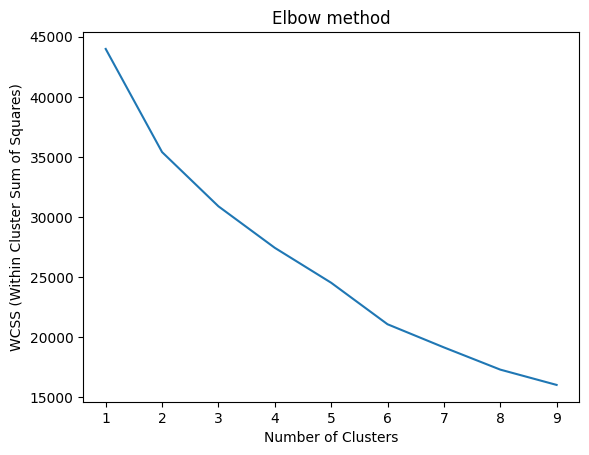

In [64]:
# WCSS (within cluster sum of squares)
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df_stan)
  wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1,10),wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()


In [66]:
clusters.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [67]:
df['k_cluster_id'] = clusters.labels_
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,k_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 2,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,Cluster 2,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,Cluster 2,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,Cluster 2,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,Cluster 1,5
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,Cluster 2,0


In [68]:
clusters.cluster_centers_

array([[ 0.43266936, -0.10828239,  1.19393518, -0.09824189, -0.05461619,
         0.91337752,  0.74449492, -0.0812539 , -0.08927402,  0.3768003 ,
         0.57410034],
       [ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [-0.29915339, -0.13134693, -0.60644259, -0.09824189, -0.06070105,
        -0.51983522, -0.49838239, -0.18682791, -0.19939754, -0.20508283,
        -0.35442184],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.38731797],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [69]:
df.groupby('k_cluster_id').agg(['mean']).reset_index()     #Ignore h_cluster_id

<ipython-input-69-0ebf595c277d>:1: FutureWarning: ['h_cluster_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('k_cluster_id').agg(['mean']).reset_index()     #Ignore h_cluster_id


,k_cluster_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1594.881180,117252.014354,60.495215,3.704944,1.000000,1.001595,39256.378788,18.760766,347.125997,1.037480,4896.791866,0.649123
1,1,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
2,2,2239.169553,43519.741845,42.457511,1.226742,1.000000,1.000403,4605.759162,6.825614,198.250503,0.616593,3696.446234,0.198953
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
5,5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [70]:
for i in range(0,6):
  df['k_cluster_id'] = df['k_cluster_id'].replace(0,'Cluster 1')
  df['k_cluster_id'] = df['k_cluster_id'].replace(1,'Cluster 2')
  df['k_cluster_id'] = df['k_cluster_id'].replace(2,'Cluster 3')
  df['k_cluster_id'] = df['k_cluster_id'].replace(3,'Cluster 4')
  df['k_cluster_id'] = df['k_cluster_id'].replace(4,'Cluster 5')
  df['k_cluster_id'] = df['k_cluster_id'].replace(5,'Cluster 6')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,k_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2,Cluster 3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2,Cluster 3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2,Cluster 3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2,Cluster 3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 2,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 2,Cluster 3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 2,Cluster 3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 2,Cluster 1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 2,Cluster 3


In [71]:
df['k_cluster_id'].value_counts()

Cluster 3    2483
Cluster 1    1254
Cluster 2     143
Cluster 5      61
Cluster 6      43
Cluster 4      15
Name: k_cluster_id, dtype: int64

    Here, we can see CLuster 3 has 2483 passengers, Cluster 1 has 1254 passengers, Cluster 2 has 143 and then the rest of the clusters
    are gradually decreased to very less to 15.

###### DBSCAN

In [73]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
y_db = dbscan.fit_predict(df_stan)

In [75]:
uni = np.unique(y_db)
uni

array([-1,  0,  1,  2])

In [76]:
df['d_cluster_id'] = dbscan.labels_
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,k_cluster_id,d_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2,Cluster 3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2,Cluster 3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2,Cluster 3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2,Cluster 3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 2,Cluster 1,0


In [77]:
for i in range(-1,3):
  df['d_cluster_id'] = df['d_cluster_id'].replace(-1,'Noise')
  df['d_cluster_id'] = df['d_cluster_id'].replace(0,'Cluster 1')
  df['d_cluster_id'] = df['d_cluster_id'].replace(1,'Cluster 2')
  df['d_cluster_id'] = df['d_cluster_id'].replace(2,'Cluster 3')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster_id,k_cluster_id,d_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2,Cluster 3,Cluster 1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2,Cluster 3,Cluster 1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2,Cluster 3,Cluster 1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2,Cluster 3,Cluster 1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 2,Cluster 1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 2,Cluster 3,Cluster 1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 2,Cluster 3,Cluster 1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 2,Cluster 1,Cluster 1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 2,Cluster 3,Cluster 1


In [78]:
df['d_cluster_id'].value_counts()


Cluster 1    3916
Noise          43
Cluster 3      26
Cluster 2      14
Name: d_cluster_id, dtype: int64